# Random Sampling
![](https://upload.wikimedia.org/wikipedia/commons/b/bf/Simple_random_sampling.PNG)

* The proliferation of data of varying quality and relevance reinforces the need for sampling as a tool to work efficiently with a variety of data and to minimize bias. 
* Even in a big data project, predictive models are typically developed and piloted with samples.
* The lefthand side represents a population that, in statistics, is assumed to follow an underlying but unknown distribution. 
* The only thing available is the sample data and its empirical distribution, shown on the righthand side. 
* To get from the lefthand side to the righthand side, a sampling procedure is used (represented by an arrow). 
* Traditional statistics focused very much on the lefthand side, using theory based on strong assumptions about the population. 
* Modern statistics has moved to the righthand side, where such assumptions are not needed.
![](images/psds_0201.png)

# Random Sampling and Sample Bias
* A **sample** is a subset of data from a larger data set; statisticians call this larger data set the population. 
* A **population** in statistics is not the same thing as in biology—it is a large, defined but sometimes theoretical or imaginary, set of data.
* **Random sampling** is a process in which each available member of the population being sampled has an equal chance of being chosen for the sample at each draw. 
* The **sample** that results is called a **simple random sample**. 
* **Sampling** can be done **with replacement**, in which observations are put back in the population after each draw for possible future reselection. Or it can be done **without replacement**, in which case observations, once selected, are unavailable for future draws.
* **Data quality** often matters more than **data quantity** when making an estimate or a model based on a sample. 
* **Data quality** in data science involves **completeness**, **consistency of format**, **cleanliness**, and **accuracy** of individual data points. 
* **Statistics** adds the notion of **representativeness**.

# Random Sampling and Sample Bias
## Bias
* **Statistical bias** refers to measurement or sampling **errors** that are **systematic** and produced by the measurement or **sampling process**. 
* An important distinction should be made between **errors due to random chance**, and **errors due to bias**. 
* Consider the physical process of a gun shooting at a target. It will not hit the absolute center of the target every time, or even much at all. An unbiased process will produce **error**, but it is **random** and does not tend strongly in any direction.

### Scatterplot of shots from a gun with true aim
![](images/psds_0202.png)
### Scatterplot of shots from a gun with biased aim
![](images/psds_0203.png)
### When a result does suggest bias (e.g., by reference to a benchmark or actual values), it is often an indicator that a statistical or machine learning model has been misspecified, or an important variable left out.

# Random Sampling and Sample Bias
## Random Selection
* There are now a variety of methods to achieve **representativeness**, but at the heart of all of them lies **random sampling**.
* **Random sampling** is not always easy.
* In **stratified sampling**, the population is divided up into **strata**, and **random samples** are taken from each **stratum**.
* In the era of big data, it is sometimes surprising that smaller is better. 
* Time and effort spent on **random sampling** not only reduce **bias**, but also allow greater attention to **data exploration** and **data quality**. 
* For example, **missing data** and **outliers** may contain useful information. 
* It might be prohibitively expensive to track down **missing values** or evaluate **outliers** in millions of records, but doing so in a sample of several thousand records may be feasible. 
* **Data plotting** and **manual inspection** bog down if there is too much data.
![](https://3.bp.blogspot.com/_Z4-MfHsyyRo/TKp-uO0udMI/AAAAAAAAAmU/NJt4V_4RgSg/s1600/TelephoneSurveys.png)

# Sampling Distribution of a Statistic
* The term **sampling distribution of a statistic** refers to the distribution of some **sample statistic**, over many samples drawn from the same population. 
* Much of classical statistics is concerned with making inferences from (small) samples to (very large) populations.
* Typically, a **sample** is drawn with the goal of measuring something (with a **sample statistic**) or modeling something (with a **statistical** or **machine learning** model). 
* Since our estimate or model is based on a sample, it might be in error; it might be different if we were to draw a different sample. 
* We are therefore interested in how different it (error) might be — a key concern is **sampling variability**. 
* If we had lots of data, we could draw additional samples and observe **the distribution of a sample statistic** directly. 
* Typically, we will calculate our estimate or model using as much data as is easily available, so the option of drawing additional samples from the population is not readily available.
* It is important to distinguish between the distribution of the individual data points, known as the **data distribution**, and the distribution of a sample statistic, known as the **sampling distribution**.
* The distribution of a **sample statistic** such as the mean is likely to be more regular and bell-shaped than the distribution of the data itself. The larger the sample that the statistic is based on, the more this is true. Also, the larger the sample, the narrower the distribution of the sample statistic.
![](images/psds_0206.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

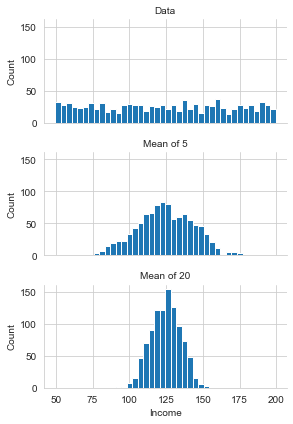

In [4]:
#np.random.normal(mu, sigma, 1000) 
#loans_income = pd.Series(np.random.normal(120, 50, size=10000))
#fig,axes = plt.subplots(1,1)
#loans_income.plot.kde()
####################################################################
#np.random.gamma(shape, scale, 1000)
#loans_income = pd.Series(np.random.gamma(50, 3, size=10000))
#fig,axes = plt.subplots(1,1)
#loans_income.plot.kde()
%matplotlib inline

####################################################################
loans_income = pd.Series(np.random.uniform(49.5, 199.5, size=10000))
####################################################################
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[49.5, 199.5,], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

# Sampling Distribution of a Statistic
## Central Limit Theorem
![](https://i.stack.imgur.com/WticG.png)

# Sampling Distribution of a Statistic
## Central Limit Theorem
> **The means drawn from multiple samples will resemble the familiar bell-shaped normal curve (see “Normal Distribution”), even if the source population is not normally distributed, provided that the sample size is large enough and the departure of the data from normality is not too great.** 

* The **central limit theorem** allows **normal-approximation** formulas like the **t-distribution** to be used in calculating **sampling distributions** for inference. That is, **confidence intervals** and **hypothesis tests**.
* The **central limit theorem** receives a lot of attention in traditional statistics texts because it underlies the machinery of **hypothesis tests** and **confidence intervals**, which themselves consume half the space in such texts. 
* Data scientists should be aware of this role, but, since formal **hypothesis tests** and **confidence intervals** play a small role in data science, and the **bootstrap** is available in any case, the **central limit theorem** is not so central in the practice of data science.


# Sampling Distribution of a Statistic
## Standard Error
* The **standard error** is a single metric that sums up the variability in the sampling distribution for a statistic. 
* The **standard error** can be estimated using a statistic based on **the standard deviation s of the sample values**, and **the sample size n**: 
$$Standard Error = SE = \frac{s}{\sqrt(n)}$$

* **As the sample size increases, the standard error decreases** 
* The relationship between **standard error** and **sample size** is sometimes referred to as the **square-root of n rule**: in order to reduce the standard error by a factor of 2, the sample size must be increased by a factor of 4.
* The validity of the **standard error** formula arises from the **central limit theorem**.
* In fact, you don’t need to rely on the **central limit theorem** to understand **standard error**. Consider the following approach to measure **standard error**:
    * Collect a number of brand new samples from the population.
    * For each new sample, calculate the statistic (e.g., mean).
    * Calculate the standard deviation of the statistics computed in step 2; use this as your estimate of standard error.
* In practice, this approach of collecting new samples to estimate the standard error is typically not feasible (and statistically very wasteful). 
* Fortunately, it turns out that it is not necessary to draw brand new samples; instead, you can use **bootstrap** resamples. In modern statistics, the **bootstrap** has become the standard way to to estimate standard error. It can be used for virtually any statistic and does not rely on the central limit theorem or other distributional assumptions.

# The Bootstrap
![](images/psds_0207.png)

# The Bootstrap
* One easy and effective way to estimate the sampling distribution of a statistic, or of model parameters, is to draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample. 
* This procedure is called the **bootstrap**, and it does not necessarily involve any assumptions about the data or the sample statistic being normally distributed.
* **Bootstrap sample**
    * A sample taken with replacement from an observed data set.
* **Resampling**
    * The process of taking repeated samples from observed data; includes both bootstrap and permutation (shuffling) procedures.
* Conceptually, you can imagine the **bootstrap** as replicating the original sample thousands or millions of times so that you have a **hypothetical population** that embodies all the knowledge from your original sample (it’s just larger). You can then draw samples from this hypothetical population for the purpose of estimating a sampling distribution.

# The Bootstrap
* In practice, it is not necessary to actually replicate the sample a huge number of times. 
* We simply replace each observation after each draw; that is, we **sample with replacement**. 
* In this way we effectively create an infinite population in which the probability of an element being drawn remains unchanged from draw to draw. 
* The algorithm for a bootstrap resampling of the mean is as follows, for a sample of size n:
    * Draw a sample value, record, replace it.
    * Repeat n times.
    * Record the mean of the n resampled values.
    * Repeat steps 1–3 R times.
    * Use the R results to:
        * Calculate their standard deviation (this estimates sample mean standard error).
        * Produce a histogram or boxplot.
        * Find a confidence interval.
* R, the number of iterations of the bootstrap, is set somewhat arbitrarily. 
* The more iterations you do, the more accurate the estimate of the standard error, or the confidence interval. 
* The result from this procedure is **a bootstrap set of sample statistics** or **estimated model parameters**, which you can then examine to see how variable they are.

In [3]:
# use sklearn.utils.resample to generate boostrap
import sklearn

results = []
for nrepeat in range(1000):
    sample = sklearn.utils.resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'sample mean: {results.mean()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 123.3264151484444
sample mean: 123.3654583977967
bias: 0.03904324935230363
std. error: 0.8397162347923202


# The Bootstrap
* The **bootstrap** can be used with multivariate data, where the rows are sampled as units. 
* A model might then be run on the bootstrapped data, for example, to estimate the stability (variability) of model parameters, or to improve predictive power. 
* With **classification and regression trees** (also called **decision trees**), running multiple trees on bootstrap samples and then averaging their predictions (or, with classification, taking a majority vote) generally performs better than using a single tree. This process is called **bagging** (short for **“bootstrap aggregating”**)
![](images/psds_0208.png)

# The Bootstrap
* The repeated resampling of the bootstrap is conceptually simple. 
* However, it is also computationally intensive, and was not a feasible option before the widespread availability of computing power. 
* The technique gained its name and took off with the publication of several journal articles and a book by Stanford statistician Bradley Efron in the late 1970s and early 1980s. 
* It was particularly popular among researchers who use statistics but are not statisticians, and for use with metrics or models where mathematical approximations are not readily available. 
* The sampling distribution of the mean has been well established since 1908; the sampling distribution of many other metrics has not. 
* The bootstrap can be used for sample size determination; experiment with different values for n to see how the sampling distribution is affected.
* **Warning**:
> The bootstrap does not compensate for a small sample size; it does not create new data, nor does it fill in holes in an existing data set. It merely informs us about how lots of additional samples would behave when drawn from a population like our original sample.
* **Resampling versus Bootstrapping**
> Sometimes the term **resampling** is used synonymously with the term **bootstrapping**, as just outlined. More often, the term resampling also includes **permutation** procedures, where multiple samples are combined and the sampling may be done without replacement. In any case, **the term bootstrap always implies sampling with replacement from an observed data set.**

# Confidence Intervals
* **Confidence level**
> The percentage of confidence intervals, constructed in the same way from the same population, expected to contain the statistic of interest.
* **Interval endpoints**
> The top and bottom of the confidence interval.  

![](https://miro.medium.com/max/3840/1*qSCzTfliGMCcPfIQcGIAJw.jpeg)

# Confidence Intervals
* **Confidence intervals** always come with a **coverage level**, expressed as a (high) percentage, say 90% or 95%. 
* One way to think of a 90% confidence interval is as follows: 
> It is the interval that encloses the central 90% of the bootstrap sampling distribution of a sample statistic. More generally, an x% confidence interval around a sample estimate should, on average, contain similar sample estimates x% of the time (when a similar sampling procedure is followed).
* Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap confidence interval is as follows:
    * Draw a random sample of size n with replacement from the data (a resample).
    * Record the statistic of interest for the resample.
    * Repeat steps 1–2 many (R) times.
    * For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from either end of the distribution.
    * The trim points are the endpoints of an x% bootstrap confidence interval.
* This image shows a a 90% confidence interval for the mean of data, based on a sample of 20 for which the mean was 57,573.
![](images/psds_0209.png)
* **The bootstrap is a general tool that can be used to generate confidence intervals for most statistics, or model parameters**. Statistical textbooks and software, with roots in over a half-century of computerless statistical analysis, will also reference confidence intervals generated by formulas, especially the t-distribution

# Normal Distribution
* The bell-shaped **normal distribution** is iconic in traditional statistics.1 The fact that **distributions of sample statistics are often normally shaped** has made it a powerful tool in the development of mathematical formulas that approximate those distributions.
* **Error**
    * The difference between a data point and a predicted or average value.
* **Standardize**
    * Subtract the mean and divide by the standard deviation.
* **z-score**
    * The result of standardizing an individual data point.
* **Standard normal**
    * A normal distribution with mean = 0 and standard deviation = 1.
* **QQ-Plot**
    * A plot to visualize how close a sample distribution is to a normal distribution.
* In a normal distribution, 68% of the data lies within one standard deviation of the mean, and 95% lies within two standard deviations.
![](images/psds_0210.png)

# Normal Distribution
## Warning
> It is a common misconception that the normal distribution is called that because most data follows a normal distribution—that is, it is the normal thing. 
> Most of the variables used in a typical data science project—in fact most raw data as a whole—are not normally distributed (example: **“Long-Tailed Distributions”**). 
> The utility of the normal distribution derives from the fact that many statistics are normally distributed in their sampling distribution. 
> Even so, assumptions of normality are generally a last resort, used when empirical probability distributions, or bootstrap distributions, are not available.
![](https://i.stack.imgur.com/QCGKr.png)

# Long-Tailed Distributions
* Tail
> The long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.
* Skew
> Where one tail of a distribution is longer than the other.
* While the **normal distribution** is often appropriate and useful with respect to the distribution of errors and sample statistics, it typically does not characterize the distribution of raw data. 
* Sometimes, the distribution is highly **skewed (asymmetric)**, such as with income data, or the distribution can be discrete, as with binomial data. Both symmetric and asymmetric distributions may have long tails. The tails of a distribution correspond to the extreme values (small and large). 

# Normal Distribution
## Standard Normal and QQ-Plots
* A **standard normal distribution** is one in which the units on the x-axis are expressed in terms of **standard deviations away from the mean**. 
* To compare data to a standard normal distribution, you **subtract the mean then divide by the standard deviation**; this is also called **normalization** or **standardization** (see “Standardization (Normalization, Z-Scores)”). 
* Note that **“standardization”** in this sense is unrelated to database record standardization (conversion to a common format). The transformed value is termed a **z-score**, and **the normal distribution is sometimes called the z-distribution**.
* A **QQ-Plot** is used to visually **determine how close a sample is to a specified distribution**, in this case the normal. 
> The QQ-Plot orders the z-scores from low to high, and plots each value’s z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the units correspond to the number of standard deviations away of the data from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal. 
* Example: a QQ-Plot for a sample of 100 values randomly generated from a normal distribution; as expected, the points closely follow the line. 
![](images/psds_0211.png)
* **Warning**
> Converting data to z-scores (i.e., standardizing or normalizing the data) does not make the data normally distributed. It just puts the data on the same scale as the standard normal distribution, often for comparison purposes.


<IPython.core.display.Javascript object>


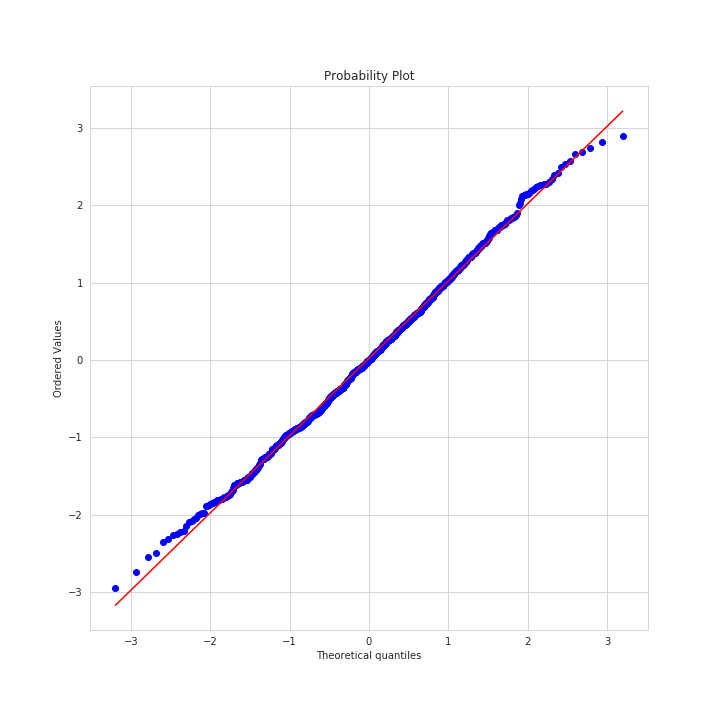

In [4]:
import scipy 
import sys
import os
#scipy.stats.probplot
fig, ax = plt.subplots(figsize=(10, 10))
norm_sample = scipy.stats.norm.rvs(size=1000)
sys.stdout = open(os.devnull, "w")
scipy.stats.probplot(norm_sample, plot=ax)
sys.stdout = sys.__stdout__

# Student’s t-Distribution
* The **t-distribution** is a normally shaped distribution, but **a bit thicker and longer on the tails**. 
* It is used extensively in depicting distributions of sample statistics. 
* Distributions of sample means are typically shaped like a t-distribution, and there is a family of t-distributions that differ depending on how large the sample is. The larger the sample, the more normally shaped the t-distribution becomes.
* n
> Sample size.
* Degrees of freedom
> A parameter that allows the t-distribution to adjust to different sample sizes, statistics, and number of groups.

![](images/psds_0213.png)

# Student’s t-Distribution
* A number of different statistics can be compared, after standardization, to the **t-distribution**, to estimate confidence intervals in light of sampling variation. 
* Consider a sample of size n for which the sample mean $\bar{x}$ has been calculated. If $s$ is the sample standard deviation, a 90% confidence interval around the sample mean is given by:  $\bar{x}±t_{n−1}(0.05)⋅\frac{s}{\sqrt{n}}$ where $t_{n−1}(0.05)$   is the value of the t-statistic, with (n – 1) degrees of freedom, that “chops off” 5% of the t-distribution at either end. 
* The t-distribution has been used as a reference for the distribution of a **sample mean**, the **difference between two sample means**, **regression parameters**, and other statistics.
* The t-distribution’s accuracy in depicting the behavior of a sample statistic requires that the distribution of that statistic for that sample be shaped like a normal distribution. It turns out that sample statistics are often normally distributed, even when the underlying population data is not (a fact which led to widespread application of the t-distribution). This phenomenon is termed the **central limit theorem**.